In [1]:
from sympy import *
from IPython.display import display
from sympy.printing.mathml import mathml
from IPython.display import display, Math, Latex

x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [2]:
def mprint(e):
    display(Math(latex(e)))

In [3]:
expr = (x**3 + x**2 - x -1)/(x**2 + 2*x +1)

In [4]:
print(type(expr))

<class 'sympy.core.mul.Mul'>


In [ ]:
mprint(expr)

In [6]:
expr = simplify(expr)
mprint(expr)

<IPython.core.display.Math object>

In [7]:
print(expr.subs(x,5))

4


In [8]:
eql = Eq(3*x+5,10)

In [9]:
z = solveset(eql,x)
display(Math(latex(z)))

<IPython.core.display.Math object>

In [10]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
expr = diff(sin(x)/x**2, x)
mprint(expr)

<IPython.core.display.Math object>

In [11]:
expr_i = integrate(expr, x)
mprint(expr_i)

<IPython.core.display.Math object>

In [16]:
a, b, c = symbols('a b c')
SSE = Eq(sqrt(b**2-4*a*c/2*a))
mprint(SSE)

<IPython.core.display.Math object>

In [21]:
x, i = symbols('x i')
s=Sum(Indexed('x',i),(i,1,3))
f = lambda x: Subs(s.doit(), [s.function.subs(s.variables[0], j)
for j in range(s.limits[0][1], s.limits[0][2] + 1)], x).doit() 
print(f((30,10,2)))
mprint(s)

42


<IPython.core.display.Math object>

In [45]:
Symbol('xhatvecbardot')

In [47]:
Symbol('xdothatbarvec')

In [46]:
yhat, ybar = symbols('yhat ybar')
yhat = Symbol('yhat')
ybar = Symbol('ybar')
mprint(yhat)
er = Eq((yhat - ybar)**2)
print(er)
mprint(er)

er = Eq((ybar - yhat)**2)
mprint(er)

<IPython.core.display.Math object>

Eq((-ybar + yhat)**2, 0)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
\int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}\, dxdy

SyntaxError: unexpected character after line continuation character (<ipython-input-48-b6636b650c0e>, line 1)

In [53]:
#!/usr/bin/env python
from __future__ import print_function

DESCRIPTION = """
Runs all the examples for testing purposes and reports successes and failures
to stderr.  An example is marked successful if the running thread does not
throw an exception, for threaded examples, such as plotting, one needs to
check the stderr messages as well.
"""

EPILOG = """
Example Usage:
   When no examples fail:
     $ ./all.py > out
     SUCCESSFUL:
       - beginner.basic
       [...]
     NO FAILED EXAMPLES
     $
   When examples fail:
     $ ./all.py -w > out
     Traceback (most recent call last):
       File "./all.py", line 111, in run_examples
     [...]
     SUCCESSFUL:
       - beginner.basic
       [...]
     FAILED:
       - intermediate.mplot2D
       [...]
     $
   Obviously, we want to achieve the first result.
"""

import imp
import optparse
import os
import sys
import traceback

# add local sympy to the module path
this_file = os.path.abspath(__file__)
sympy_dir = os.path.join(os.path.dirname(this_file), "..")
sympy_dir = os.path.normpath(sympy_dir)
sys.path.insert(0, sympy_dir)

import sympy

TERMINAL_EXAMPLES = [
    "beginner.basic",
    "beginner.differentiation",
    "beginner.expansion",
    "beginner.functions",
    "beginner.limits_examples",
    "beginner.precision",
    "beginner.print_pretty",
    "beginner.series",
    "beginner.substitution",
    "intermediate.coupled_cluster",
    "intermediate.differential_equations",
    "intermediate.infinite_1d_box",
    "intermediate.partial_differential_eqs",
    "intermediate.trees",
    "intermediate.vandermonde",
    "advanced.curvilinear_coordinates",
    "advanced.dense_coding_example",
    "advanced.fem",
    "advanced.gibbs_phenomenon",
    "advanced.grover_example",
    "advanced.hydrogen",
    "advanced.pidigits",
    "advanced.qft",
    "advanced.relativity",
]

WINDOWED_EXAMPLES = [
    "beginner.plotting_nice_plot",
    "intermediate.mplot2d",
    "intermediate.mplot3d",
    "intermediate.print_gtk",
    "advanced.autowrap_integrators",
    "advanced.autowrap_ufuncify",
    "advanced.pyglet_plotting",
]

EXAMPLE_DIR = os.path.dirname(__file__)


def __import__(name, globals=None, locals=None, fromlist=None):
    """An alternative to the import function so that we can import
    modules defined as strings.
    This code was taken from: http://docs.python.org/lib/examples-imp.html
    """
    # Fast path: see if the module has already been imported.
    try:
        return sys.modules[name]
    except KeyError:
        pass

    # If any of the following calls raises an exception,
    # there's a problem we can't handle -- let the caller handle it.
    module_name = name.split('.')[-1]
    module_path = os.path.join(EXAMPLE_DIR, *name.split('.')[:-1])

    fp, pathname, description = imp.find_module(module_name, [module_path])

    try:
        return imp.load_module(module_name, fp, pathname, description)
    finally:
        # Since we may exit via an exception, close fp explicitly.
        if fp:
            fp.close()


def load_example_module(example):
    """Loads modules based upon the given package name"""
    mod = __import__(example)
    return mod


def run_examples(windowed=False, quiet=False, summary=True):
    """Run all examples in the list of modules.
    Returns a boolean value indicating whether all the examples were
    successful.
    """
    successes = []
    failures = []
    examples = TERMINAL_EXAMPLES
    if windowed:
        examples += WINDOWED_EXAMPLES

    if quiet:
        from sympy.utilities.runtests import PyTestReporter
        reporter = PyTestReporter()
        reporter.write("Testing Examples\n")
        reporter.write("-" * reporter.terminal_width)
    else:
        reporter = None

    for example in examples:
        if run_example(example, reporter=reporter):
            successes.append(example)
        else:
            failures.append(example)

    if summary:
        show_summary(successes, failures, reporter=reporter)

    return len(failures) == 0


def run_example(example, reporter=None):
    """Run a specific example.
    Returns a boolean value indicating whether the example was successful.
    """
    if reporter:
        reporter.write(example)
    else:
        print("=" * 79)
        print("Running: ", example)

    try:
        mod = load_example_module(example)
        if reporter:
            suppress_output(mod.main)
            reporter.write("[PASS]", "Green", align="right")
        else:
            mod.main()
        return True
    except KeyboardInterrupt as e:
        raise e
    except:
        if reporter:
            reporter.write("[FAIL]", "Red", align="right")
        traceback.print_exc()
        return False


class DummyFile(object):
    def write(self, x):
        pass


def suppress_output(fn):
    """Suppresses the output of fn on sys.stdout."""
    save_stdout = sys.stdout
    try:
        sys.stdout = DummyFile()
        fn()
    finally:
        sys.stdout = save_stdout


def show_summary(successes, failures, reporter=None):
    """Shows a summary detailing which examples were successful and which failed."""
    if reporter:
        reporter.write("-" * reporter.terminal_width)
        if failures:
            reporter.write("FAILED:\n", "Red")
            for example in failures:
                reporter.write("  %s\n" % example)
        else:
            reporter.write("ALL EXAMPLES PASSED\n", "Green")
    else:
        if successes:
            print("SUCCESSFUL: ", file=sys.stderr)
            for example in successes:
                print("  -", example, file=sys.stderr)
        else:
            print("NO SUCCESSFUL EXAMPLES", file=sys.stderr)

        if failures:
            print("FAILED: ", file=sys.stderr)
            for example in failures:
                print("  -", example, file=sys.stderr)
        else:
            print("NO FAILED EXAMPLES", file=sys.stderr)


def main(*args, **kws):
    """Main script runner"""
    parser = optparse.OptionParser()
    parser.add_option('-w', '--windowed', action="store_true", dest="windowed",
        help="also run examples requiring windowed environment")
    parser.add_option('-q', '--quiet', action="store_true", dest="quiet",
        help="runs examples in 'quiet mode' suppressing example output and \
              showing simple status messages.")
    parser.add_option('--no-summary', action="store_true", dest="no_summary",
        help="hides the summary at the end of testing the examples")

    (options, _) = parser.parse_args()

    return 0 if run_examples(windowed=options.windowed, quiet=options.quiet,
                             summary=not options.no_summary) else 1


if __name__ == "__main__":
    sys.exit(main(*sys.argv[1:]))

NameError: name '__file__' is not defined

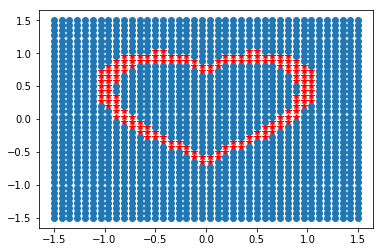

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pyradbas as pyrb  #pip install pyradbas from an Anacoda command prompt

#Defines the mesh
x = np.linspace(-1.5, 1.5, 40)
x, y = np.meshgrid(x, x)
P = np.vstack([x.flatten(), y.flatten()])

#Defines the function
heart = lambda x,y: np.abs(x**2.+2*(y-0.5*np.sqrt(np.abs(x)))**2.-1)

#Evaluates function over every point of the grid
V = heart(P[0:1], P[1:])

#Plot
plt.plot(P[0:1][V<0.2], P[1:][V<0.2], '*r', P[0:1][V>=0.2], P[1:][V>=0.2], 'o')
plt.show()